#Monitoramento das causas de estresse nos alunos de hoje

##Importando bibliotecas

In [1]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import math

##Checando os dados

In [2]:
df = pd.read_csv('Stress_Dataset.csv')

In [3]:
df.head()

,Gender,Age,Have you recently experienced stress in your life?,Have you noticed a rapid heartbeat or palpitations?,Have you been dealing with anxiety or tension recently?,Do you face any sleep problems or difficulties falling asleep?,Have you been dealing with anxiety or tension recently?.1,Have you been getting headaches more often than usual?,Do you get irritated easily?,Do you have trouble concentrating on your academic tasks?,...,Are you facing any difficulties with your professors or instructors?,Is your working environment unpleasant or stressful?,Do you struggle to find time for relaxation and leisure activities?,Is your hostel or home environment causing you difficulties?,Do you lack confidence in your academic performance?,Do you lack confidence in your choice of academic subjects?,Academic and extracurricular activities conflicting for you?,Do you attend classes regularly?,Have you gained/lost weight?,Which type of stress do you primarily experience?
0,0,20,3,4,2,5,1,2,1,2,...,3,1,4,1,2,1,3,1,2,Eustress (Positive Stress) - Stress that motiv...
1,0,20,2,3,2,1,1,1,1,4,...,3,2,1,1,3,2,1,4,2,Eustress (Positive Stress) - Stress that motiv...
2,0,20,5,4,2,2,1,3,4,2,...,2,2,2,1,4,1,1,2,1,Eustress (Positive Stress) - Stress that motiv...
3,1,20,3,4,3,2,2,3,4,3,...,1,1,2,1,2,1,1,5,3,Eustress (Positive Stress) - Stress that motiv...
4,0,20,3,3,3,2,2,4,4,4,...,2,3,1,2,2,4,2,2,2,Eustress (Positive Stress) - Stress that motiv...


In [4]:
df.columns

Index(['Gender', 'Age', 'Have you recently experienced stress in your life?',
       'Have you noticed a rapid heartbeat or palpitations?',
       'Have you been dealing with anxiety or tension recently?',
       'Do you face any sleep problems or difficulties falling asleep?',
       'Have you been dealing with anxiety or tension recently?.1',
       'Have you been getting headaches more often than usual?',
       'Do you get irritated easily?',
       'Do you have trouble concentrating on your academic tasks?',
       'Have you been feeling sadness or low mood?',
       'Have you been experiencing any illness or health issues?',
       'Do you often feel lonely or isolated?',
       'Do you feel overwhelmed with your academic workload?',
       'Are you in competition with your peers, and does it affect you?',
       'Do you find that your relationship often causes you stress?',
       'Are you facing any difficulties with your professors or instructors?',
       'Is your working env

###Dicionário de colunas

* Gender: gênero do estudante; 0 (Male), 1 (Female)
* Age: Idade numérica (18 a 21)

####Indicadores emocionais e de estresse

* Have you recently experienced stress in your life?: Você passou por algum estresse recentemente?
* Have you noticed a rapid heartbeat or palpitations?: Você notou batimentos cardíacos acelerados ou palpitações?
* Have you been dealing with anxiety or tension recently?: Você tem lidado com ansiedade ou tensão recentemente?
* Do you face any sleep problems or difficulties falling asleep?: Você enfrenta algum problema de sono ou dificuldade para dormir?
* Do you have trouble concentrating on your academic tasks?: Você tem dificuldade para se concentrar em suas tarefas acadêmicas?
* Have you been feeling sadness or low mood?: Você tem se sentido triste ou de mau humor?
* Do you get irritated easily?: Você se irrita facilmente?
* Do you often feel lonely or isolated?: Você costuma se sentir solitário ou isolado?

####Indicadores Físicos e de Saúde

* Have you been getting headaches more often than usual?: Você tem tido dores de cabeça com mais frequência do que o normal?
* Have you been experiencing any illness or health issues?: Você tem enfrentado alguma doença ou problema de saúde?
* Have you gained/lost weight?: Você ganhou/perdeu peso?
####Estressores Acadêmicos e Ambientais
* Do you feel overwhelmed with your academic workload?: Você se sente sobrecarregado com sua carga de trabalho acadêmica?
* Are you in competition with your peers, and does it affect you?: Você está competindo com seus colegas e isso afeta você?
* Do you lack confidence in your academic performance?: Você não tem confiança no seu desempenho acadêmico?
* Do you lack confidence in your choice of academic subjects?: Você não tem confiança na sua escolha de disciplinas acadêmicas?
* Academic and extracurricular activities conflicting for you?: Atividades acadêmicas e extracurriculares são conflitantes para você?
* Do you attend classes regularly?: Você frequenta as aulas regularmente?
* Are you facing any difficulties with your professors or instructors?: Você está enfrentando alguma dificuldade com seus professores ou instrutores?
* Is your working environment unpleasant or stressful?: Seu ambiente de trabalho é desagradável ou estressante?
* Is your hostel or home environment causing you difficulties?: O seu albergue ou ambiente doméstico está lhe causando dificuldades?

####Fatores sociais e de relacionamento

* Do you find that your relationship often causes you stress?: Você acha que seu relacionamento frequentemente lhe causa estresse?
* Do you struggle to find time for relaxation and leisure activities?: Você tem dificuldade em encontrar tempo para relaxamento e atividades de lazer?

####Variável de destino

* Which type of stress do you primarily experience?: Eustress, Distress, No Stress Que tipo de estresse você vivencia principalmente?: Eustresse, Angústia, Sem Estresse

###Sobre o conjunto de dados:

O presente conjunto de dados reúne as respostas de 843 estudantes universitários, com idades entre 18 e 21 anos, a respeito de suas experiências relacionadas a estresse, saúde, relacionamentos, desempenho acadêmico e bem-estar emocional.

As informações foram obtidas por meio de um questionário online aplicado via Google Forms, utilizando uma escala Likert de cinco pontos, que variava de “Nem um pouco” a “Extremamente”. Todas as respostas foram coletadas de forma anônima, assegurando a confidencialidade e a privacidade dos participantes.

###Dicionário de respostas

| Faixa de avaliação original | Descrição          | Categoria simplificada |
|----------------------------|--------------------|------------------------|
| 1 – None                   | Nenhum             | Below median (1–2)     |
| 2 – Little                 | Pouco              | Below median (1–2)     |
| 3 – Some                   | Algum              | Median (3)             |
| 4 – Quite a bit            | Bastante           | Above median (4–5)     |
| 5 – Very much              | Muito              | Above median (4–5)     |


##Análise Exploratória

In [5]:
print(f'O dataset tem {df.shape[0]} linhas')
print(f'O dataset tem {df.shape[1]} colunas')

O dataset tem 843 linhas
O dataset tem 26 colunas


In [6]:
df.info(26)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843 entries, 0 to 842
Data columns (total 26 columns):
 #   Column                                                                Non-Null Count  Dtype 
---  ------                                                                --------------  ----- 
 0   Gender                                                                843 non-null    int64 
 1   Age                                                                   843 non-null    int64 
 2   Have you recently experienced stress in your life?                    843 non-null    int64 
 3   Have you noticed a rapid heartbeat or palpitations?                   843 non-null    int64 
 4   Have you been dealing with anxiety or tension recently?               843 non-null    int64 
 5   Do you face any sleep problems or difficulties falling asleep?        843 non-null    int64 
 6   Have you been dealing with anxiety or tension recently?.1             843 non-null    int64 
 7   Have you

O conjunto de dados é composto por 25 variáveis numéricas, correspondentes às questões avaliadas em escala Likert de 1 a 5, além de 1 variável categórica em formato de texto.

Não foram identificados valores ausentes (nulos) no dataset, o que garante a consistência das análises.

Na sequência, será realizado o cálculo do total de respostas para cada coluna dentro da escala de 1 a 5. Para melhor organização e clareza, os resultados serão apresentados em cinco tabelas distintas, o que permitirá uma visualização estruturada.

In [7]:
# Lista das colunas que possuem respostas na escala 1–5
colunas_escala1 = [
'Have you recently experienced stress in your life?', 
'Have you noticed a rapid heartbeat or palpitations?',
'Have you been dealing with anxiety or tension recently?', 
'Do you face any sleep problems or difficulties falling asleep?', 
'Have you been dealing with anxiety or tension recently?.1'] #Retorna apenas as perguntas na escala de 1 a 5.

# Criar tabela resumo com contagem de valores (1–5) para cada coluna
tabela_resumo1 = df[colunas_escala1].apply(pd.Series.value_counts).sort_index()
#apply(pd.Series.value_counts): Para cada coluna, Conta quantas vezes cada valor (1,2,3,4,5) aparece.
#Cria um DataFrame onde: Índice = valores da escala (1–5), Colunas = perguntas, Valores = contagem de respostas
#.sort_index(): Garante que os valores apareçam na ordem correta (1 a 5).

# Exibir a tabela
tabela_resumo1.head()

,Have you recently experienced stress in your life?,Have you noticed a rapid heartbeat or palpitations?,Have you been dealing with anxiety or tension recently?,Do you face any sleep problems or difficulties falling asleep?,Have you been dealing with anxiety or tension recently?.1
1,78,106,193,158,177
2,219,282,247,215,250
3,263,222,217,215,180
4,193,178,124,159,152
5,90,55,62,96,84


In [8]:
colunas_escala2 = [
'Have you been getting headaches more often than usual?',
'Do you get irritated easily?', 
'Do you have trouble concentrating on your academic tasks?', 
'Have you been feeling sadness or low mood?',
'Have you been experiencing any illness or health issues?']


tabela_resumo2 = df[colunas_escala2].apply(pd.Series.value_counts).sort_index()
tabela_resumo2.head()

,Have you been getting headaches more often than usual?,Do you get irritated easily?,Do you have trouble concentrating on your academic tasks?,Have you been feeling sadness or low mood?,Have you been experiencing any illness or health issues?
1,190,203,197,186,218
2,234,186,198,253,207
3,204,208,211,206,232
4,129,151,135,121,109
5,86,95,102,77,77


In [9]:
colunas_escala3 = [
'Do you often feel lonely or isolated?', 
'Do you feel overwhelmed with your academic workload?',
'Are you in competition with your peers, and does it affect you?', 
'Do you find that your relationship often causes you stress?', 
'Are you facing any difficulties with your professors or instructors?']


tabela_resumo3 = df[colunas_escala3].apply(pd.Series.value_counts).sort_index()
tabela_resumo3.head()

,Do you often feel lonely or isolated?,Do you feel overwhelmed with your academic workload?,"Are you in competition with your peers, and does it affect you?",Do you find that your relationship often causes you stress?,Are you facing any difficulties with your professors or instructors?
1,232,237,207,219,216
2,222,198,262,223,252
3,194,216,202,222,221
4,128,130,102,106,90
5,67,62,70,73,64


In [10]:
colunas_escala4 = [
'Is your working environment unpleasant or stressful?', 
'Do you struggle to find time for relaxation and leisure activities?', 
'Is your hostel or home environment causing you difficulties?', 
'Do you lack confidence in your academic performance?', 
'Do you lack confidence in your choice of academic subjects?']


tabela_resumo4 = df[colunas_escala4].apply(pd.Series.value_counts).sort_index()
tabela_resumo4.head()

,Is your working environment unpleasant or stressful?,Do you struggle to find time for relaxation and leisure activities?,Is your hostel or home environment causing you difficulties?,Do you lack confidence in your academic performance?,Do you lack confidence in your choice of academic subjects?
1,206,220,242,220,205
2,249,224,247,200,209
3,219,215,182,225,211
4,108,111,98,109,119
5,61,73,74,89,99


In [11]:
colunas_escala5 = [
'Academic and extracurricular activities conflicting for you?',
'Do you attend classes regularly?', 
'Have you gained/lost weight?']


tabela_resumo5 = df[colunas_escala5].apply(pd.Series.value_counts).sort_index()
tabela_resumo5.head()

,Academic and extracurricular activities conflicting for you?,Do you attend classes regularly?,Have you gained/lost weight?
1,157,85,194
2,234,135,300
3,203,238,213
4,155,247,91
5,94,138,45


Esses valores podem ser visualizados em formato percentual por meio de gráficos de barras, o que possibilita uma análise mais clara, intuitiva e comparativa dos resultados entre as diferentes questões.

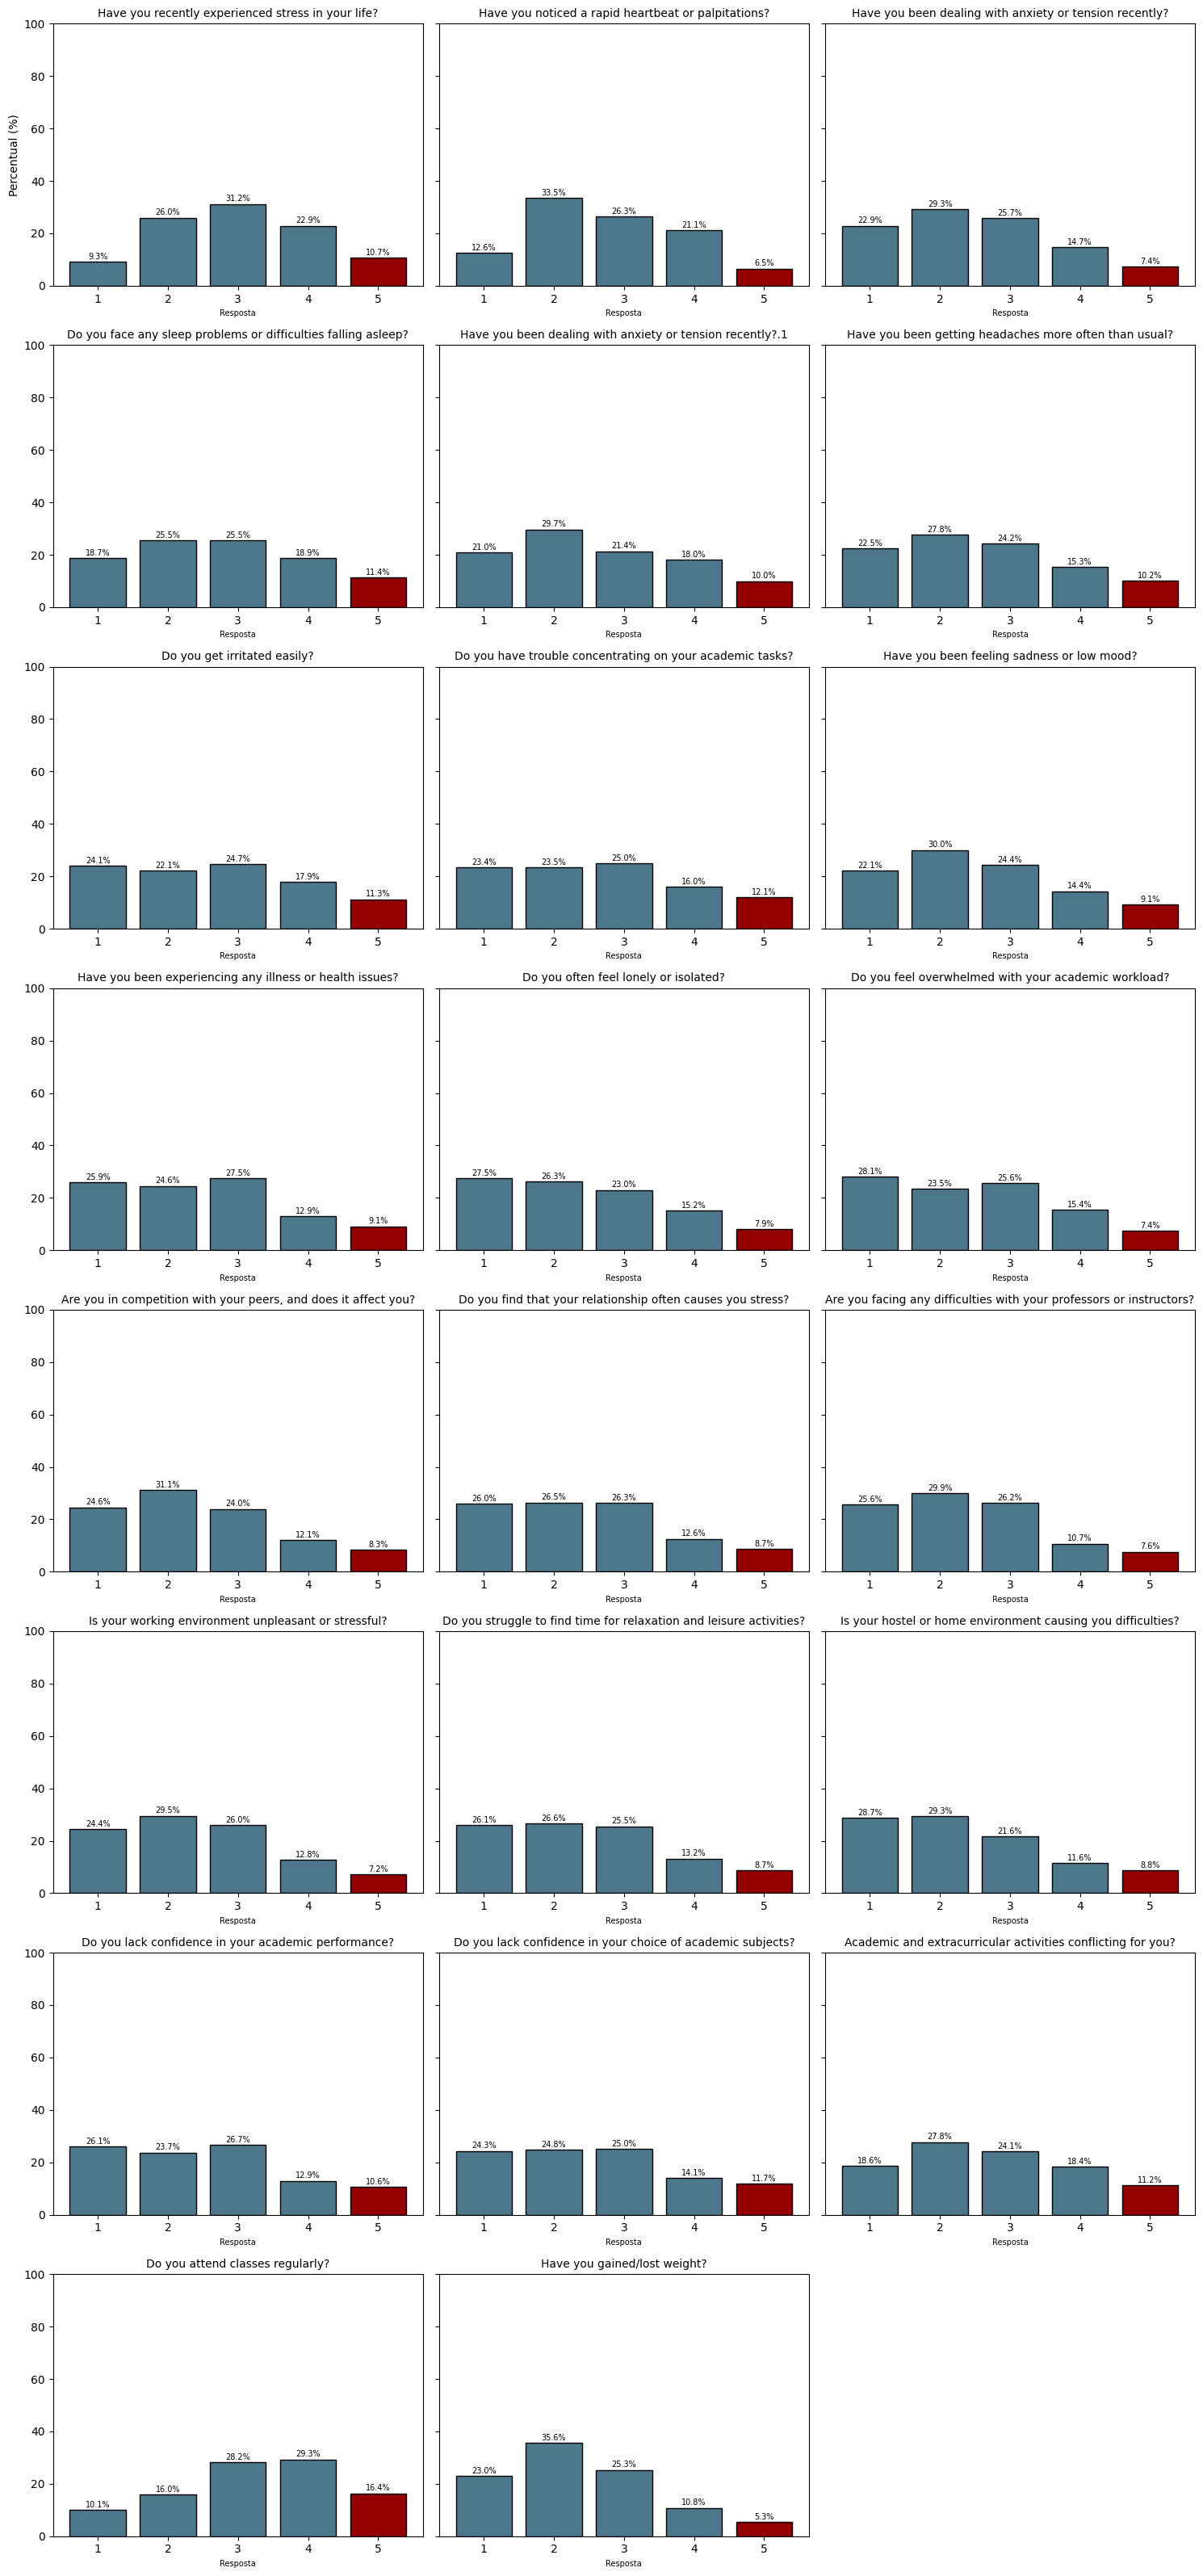

In [12]:
# Copiar o DataFrame original
df2 = df.copy()

# Lista de colunas a serem analisadas
variaveis = [
    "Have you recently experienced stress in your life?",
    "Have you noticed a rapid heartbeat or palpitations?",
    "Have you been dealing with anxiety or tension recently?",
    "Do you face any sleep problems or difficulties falling asleep?",
    "Have you been dealing with anxiety or tension recently?.1", 'Have you been getting headaches more often than usual?',
'Do you get irritated easily?', 'Do you have trouble concentrating on your academic tasks?', 'Have you been feeling sadness or low mood?',
'Have you been experiencing any illness or health issues?','Do you often feel lonely or isolated?', 'Do you feel overwhelmed with your academic workload?',
'Are you in competition with your peers, and does it affect you?', 'Do you find that your relationship often causes you stress?', 
'Are you facing any difficulties with your professors or instructors?','Is your working environment unpleasant or stressful?', 
'Do you struggle to find time for relaxation and leisure activities?', 'Is your hostel or home environment causing you difficulties?', 
'Do you lack confidence in your academic performance?', 'Do you lack confidence in your choice of academic subjects?', 'Academic and extracurricular activities conflicting for you?',
'Do you attend classes regularly?', 'Have you gained/lost weight?'  
] #Contém 23 perguntas (nomes das colunas). Cada pergunta vira um gráfico separado.

# Definir layout: 3 gráficos por linha
num_graficos = len(variaveis)
colunas_por_linha = 3
linhas = math.ceil(num_graficos / colunas_por_linha) # Calcula quantas linhas serão necessárias

# Criar figura com múltiplas linhas e colunas de subplots
fig, axes = plt.subplots(linhas, colunas_por_linha, figsize=(15, linhas * 4), sharey=True)
axes = axes.flatten() 
#plt.subplots(linhas, colunas_por_linha) cria a grade de gráficos.
#figsize=(15, linhas * 4) define tamanho proporcional ao número de linhas.
#sharey=True faz todos os gráficos compartilharem a mesma escala no eixo Y (comparação facilitada).
#axes.flatten() transforma a matriz de eixos (axes) em lista única, para iterar facilmente no loop.

for ax, coluna in zip(axes, variaveis): #zip(axes, variaveis) percorre cada subplot (ax) e cada pergunta (coluna) simultaneamente.
   
    # Calcular percentuais por resposta (1 a 5)
    valores = df2[coluna].value_counts(normalize=True).sort_index() * 100
    #value_counts(normalize=True) conta valores em proporção (0–1).
    # *100 converte para percentual (0–100).
    #sort_index() organiza as respostas na ordem 1,2,3,4,5.

    # Definir cores: azul padrão, resposta 5 em vermelho
    cores = ['#4d778b' if i != 5 else '#920000' for i in valores.index]
    #Respostas 1–4 → azul escuro (#4d778b).
    #Resposta 5 (Muito estressado) → vermelho escuro (#920000).

    # Plotar barras
    ax.bar(valores.index, valores.values, color=cores, edgecolor='black')
    #edgecolor='black' adiciona contorno preto nas barras.

    # Personalização do gráfico
    ax.set_title(coluna, fontsize=10) #Título = nome da pergunta (coluna).
    ax.set_xticks([1,2,3,4,5]) #X-axis fixo em 1 a 5.
    ax.set_ylim(0, 100) #Y-axis limitado de 0 a 100 (%).
    ax.set_xlabel('Resposta', fontsize=7) #Rótulo do eixo X = "Resposta".
    
    # Adicionar percentuais acima das barras
    for i, v in zip(valores.index, valores.values):
        ax.text(i, v+1, f"{v:.1f}%", ha='center', fontsize=7) #v+1 posiciona o texto um pouco acima da barra.

# Remover gráficos extras vazios (se houver)
for i in range(len(variaveis), len(axes)):
    fig.delaxes(axes[i])
    #Se a grade tiver mais subplots do que perguntas, os extras são apagados (última linha incompleta).

# Y-label apenas no primeiro gráfico
axes[0].set_ylabel('Percentual (%)') #Define o rótulo do eixo Y apenas no primeiro gráfico de cada linha (para não poluir os outros).

plt.tight_layout() #ajusta o espaçamento automático entre os gráficos.
plt.show() #exibe a figura final.

A análise dos gráficos evidencia uma maior concentração de respostas nos níveis 2, 3 e 4, indicando que a maioria dos estudantes se encontra em um patamar intermediário de estresse. Questões relacionadas à sobrecarga acadêmica, competição entre colegas, ambiente de estudo/trabalho e falta de lazer apresentam percentuais expressivos, situando-se entre 25% e 30%, o que sugere a presença de um estresse constante, mas não extremo, afetando uma parcela significativa da amostra.

O nível 5 (destacado em vermelho por representar a situação mais crítica) aparece em baixa frequência (<15%). Ainda assim, algumas variáveis se sobressaem nesse patamar máximo, como problemas de sono (~11%), ansiedade/tensão (~10%), irritabilidade (~11%) e falta de confiança no desempenho acadêmico (~10%). Esses resultados apontam que, embora em menor número, há um grupo de estudantes enfrentando dificuldades severas nesses aspectos.

Por outro lado, a resposta 1, que indica ausência de problemas, também apresenta percentuais baixos em diversas questões, revelando que poucos participantes estão totalmente livres de estresse ou dificuldades.

Por fim, o gráfico a seguir apresenta a média percentual das respostas entre todas as questões, permitindo uma visão global da distribuição dos níveis de estresse entre os estudantes.

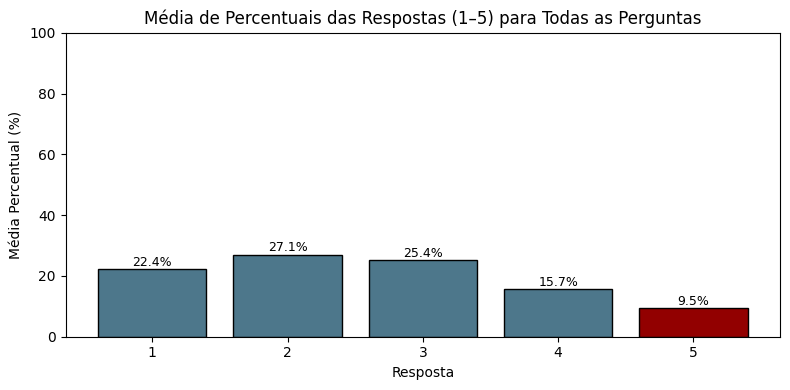

In [13]:
# Calcular tabela com percentuais por resposta (1-5) para todas as variáveis
tabela_percentuais = df2[variaveis].apply(pd.Series.value_counts, normalize=True).sort_index() * 100

# Calcular a média de percentual de cada resposta (1–5)
media_percentuais = tabela_percentuais.mean(axis=1)

# Definir cores: azul para 1–4 e vermelho para 5
cores = ['#4d778b' if i != 5 else '#920000' for i in media_percentuais.index]

# Criar gráfico de barras
plt.figure(figsize=(8,4))
plt.bar(media_percentuais.index, media_percentuais.values, color=cores, edgecolor='black')

# Personalizar gráfico
plt.xticks([1,2,3,4,5])
plt.ylim(0,100)
plt.xlabel('Resposta')
plt.ylabel('Média Percentual (%)')
plt.title('Média de Percentuais das Respostas (1–5) para Todas as Perguntas')

# Adicionar valores acima das barras
for i, v in zip(media_percentuais.index, media_percentuais.values):
    plt.text(i, v+1, f"{v:.1f}%", ha='center', fontsize=9)

plt.tight_layout()
plt.show()

As respostas mais frequentes foram 2 (27,1%) e 3 (25,4%), indicando que a maior parte dos participantes se encontra entre os estados de “sentindo-se bem” e “um pouco estressado”. Essa concentração sugere que a maioria está em um patamar de equilíbrio aceitável, embora o nível 3 represente um ponto de atenção, já que sinaliza um estresse mediano que, sem suporte adequado, pode evoluir para níveis mais críticos.

A resposta 1 (22,4%) também apresentou valor considerável, representando um grupo relevante de estudantes que relatam nenhum estresse.

Por outro lado, as respostas 4 (15,7%) e 5 (9,5%) foram as menos frequentes, mas ainda assim revelam que um quarto da amostra (25,2%) demonstra sinais de estresse significativo ou alto, o que merece atenção preventiva por parte das instituições de ensino e programas de apoio psicológico.

De forma geral, o cenário não é altamente crítico, mas há uma porção relevante da amostra com estresse moderado a elevado, que não pode ser negligenciada.

O dicionário de respostas possibilitou o agrupamento das opções originais em três categorias simplificadas: Below Median (1–2), Median (3) e Above Median (4–5). A tabela a seguir apresenta a distribuição percentual dos participantes dentro de cada categoria, oferecendo uma visão mais clara sobre a prevalência de cada faixa de estresse.

In [14]:
def categorizar_resposta(x):
    if x in [1, 2]:
        return 'Below Median'
    elif x == 3:
        return 'Median'
    elif x in [4, 5]:
        return 'Above Median'
    else:
        return None  # caso tenha valores nulos ou inválidos

df_categoria = df[variaveis].apply(lambda col: col.map(categorizar_resposta))

In [15]:
tabela_categorias = df_categoria.apply(pd.Series.value_counts, normalize=True) * 100
tabela_categorias = tabela_categorias.transpose()
tabela_categorias.head(23)

,Above Median,Below Median,Median
Have you recently experienced stress in your life?,33.570581,35.231317,31.198102
Have you noticed a rapid heartbeat or palpitations?,27.639383,46.026097,26.334520
Have you been dealing with anxiety or tension recently?,22.064057,52.194543,25.741400
Do you face any sleep problems or difficulties falling asleep?,30.249110,44.246738,25.504152
Have you been dealing with anxiety or tension recently?.1,27.995255,50.652432,21.352313
Have you been getting headaches more often than usual?,25.504152,50.296560,24.199288
Do you get irritated easily?,29.181495,46.144721,24.673784
Do you have trouble concentrating on your academic tasks?,28.113879,46.856465,25.029656
Have you been feeling sadness or low mood?,23.487544,52.075919,24.436536
Have you been experiencing any illness or health issues?,22.064057,50.415184,27.520759


####Interpretação das Categorias de Estresse

* Below Median (1–2): baixo ou nenhum estresse.
* Median (3): estresse moderado.
* Above Median (4–5): estresse elevado.

A distribuição mostra predominância nas categorias 1 e 2, indicando que muitos entrevistados relatam baixo ou nenhum estresse em várias dimensões avaliadas. Aspectos como peso corporal, ambiente familiar, relação com professores e competição entre colegas aparecem com índices reduzidos de estresse, sugerindo que, para a maioria, esses fatores não representam problemas significativos.

Por outro lado, existe uma camada intermediária de estudantes na categoria Median (3), especialmente em temas ligados à saúde física, relacionamentos e ambiente acadêmico. Esse grupo merece atenção, pois pode evoluir para níveis mais elevados de estresse caso não haja suporte preventivo.

Entretanto, algumas questões se destacam pelo elevado percentual na categoria Above Median (4–5). Entre elas:

* Assiduidade acadêmica, onde quase metade dos estudantes relatam alto estresse relacionado à frequência em aulas;
* Estresse geral,
* Problemas de sono, e
* Irritabilidade.

Esses fatores aparecem como pontos críticos, sinalizando impacto relevante tanto na saúde mental quanto na rotina acadêmica dos participantes.

Na sequência, o gráfico de ranking (Top 5) apresenta de forma visual os principais fatores que mais contribuem para o aumento do nível de estresse dos estudantes.



Na sequência observa-se o gráfico com o top 5 fatores que podem elevar o nível de estresse dos estudantes

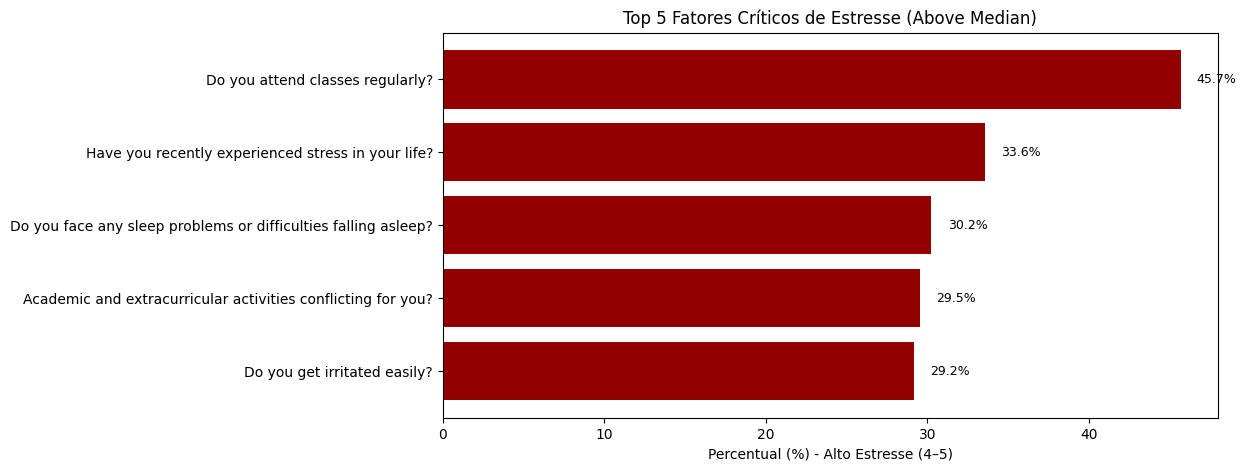

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Criar DataFrame com os valores (apenas exemplo com as 23 perguntas que você trouxe)
dados = {
    "Pergunta": [
        "Have you recently experienced stress in your life?",
        "Have you noticed a rapid heartbeat or palpitations?",
        "Have you been dealing with anxiety or tension recently?",
        "Do you face any sleep problems or difficulties falling asleep?",
        "Have you been dealing with anxiety or tension recently?.1",
        "Have you been getting headaches more often than usual?",
        "Do you get irritated easily?",
        "Do you have trouble concentrating on your academic tasks?",
        "Have you been feeling sadness or low mood?",
        "Have you been experiencing any illness or health issues?",
        "Do you often feel lonely or isolated?",
        "Do you feel overwhelmed with your academic workload?",
        "Are you in competition with your peers, and does it affect you?",
        "Do you find that your relationship often causes you stress?",
        "Are you facing any difficulties with your professors or instructors?",
        "Is your working environment unpleasant or stressful?",
        "Do you struggle to find time for relaxation and leisure activities?",
        "Is your hostel or home environment causing you difficulties?",
        "Do you lack confidence in your academic performance?",
        "Do you lack confidence in your choice of academic subjects?",
        "Academic and extracurricular activities conflicting for you?",
        "Do you attend classes regularly?",
        "Have you gained/lost weight?"
    ],
    "Above Median": [
        33.570581, 27.639383, 22.064057, 30.249110, 27.995255, 25.504152, 29.181495,
        28.113879, 23.487544, 22.064057, 23.131673, 22.775801, 20.403321, 21.233689,
        18.268090, 20.047450, 21.826809, 20.403321, 23.487544, 25.860024, 29.537367,
        45.670225, 16.132859
    ]
}

df_above = pd.DataFrame(dados)

# Selecionar Top 5 em Above Median
top5 = df_above.nlargest(5, "Above Median")

# Plotar gráfico
plt.figure(figsize=(10,5))
bars = plt.barh(top5["Pergunta"], top5["Above Median"], color="#920000")
plt.xlabel("Percentual (%) - Alto Estresse (4–5)")
plt.title("Top 5 Fatores Críticos de Estresse (Above Median)")
plt.gca().invert_yaxis()  # Deixa o maior em cima

# Adicionar rótulos de valores nas barras
for bar in bars:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
             f"{bar.get_width():.1f}%", va="center", fontsize=9)

plt.show()


####Principais Fatores Críticos de Estresse

1. Frequência às aulas

* Aparece como o fator mais crítico, com 45,7% dos estudantes marcando nível elevado.
* Esse resultado, no entanto, não pode ser interpretado isoladamente: ele indica apenas que quase metade dos alunos relatou alta frequência às aulas, mas não necessariamente que a frequência em si seja a causa do estresse.

2. Estresse geral

* O segundo fator mais presente, afetando cerca de 1/3 da amostra.
* Esse dado sugere que o estresse está fortemente enraizado na rotina universitária, influenciando diferentes aspectos da vida acadêmica e pessoal dos participantes.

3. Problemas de sono

* Destacados como fator relevante, indicando que a qualidade do descanso está comprometida.
* O sono insuficiente ou de má qualidade tende a potencializar outros sintomas de estresse, como ansiedade, irritabilidade e dificuldade de concentração.

4. Conflito entre atividades acadêmicas e extracurriculares

* Reportado por quase 30% dos estudantes.
* Esse resultado reflete a dificuldade em equilibrar estudos, atividades paralelas e vida pessoal, um ponto de atenção na gestão do tempo e carga de responsabilidades.

5. Irritabilidade

* Quase 1 em cada 3 estudantes relatou esse sintoma.
* A irritabilidade é um sinal clássico de estresse, reforçando a necessidade de acompanhamento psicológico e estratégias de enfrentamento para mitigar seus impactos emocionais.

####Próxima Etapa: Matriz de Probabilidade Condicional

Na sequência, apresenta-se um mapa de calor (heatmap) construído a partir da matriz de probabilidade condicional para as respostas 5.
Esse gráfico permite verificar até que ponto marcar o nível mais alto de estresse em uma questão aumenta a probabilidade de o mesmo ocorrer em outra.

Assim, é possível identificar relações diretas entre fatores de estresse (por exemplo: problemas de sono → dificuldade de concentração, ou ansiedade → dores de cabeça), oferecendo uma visão mais integrada do impacto das diferentes variáveis.

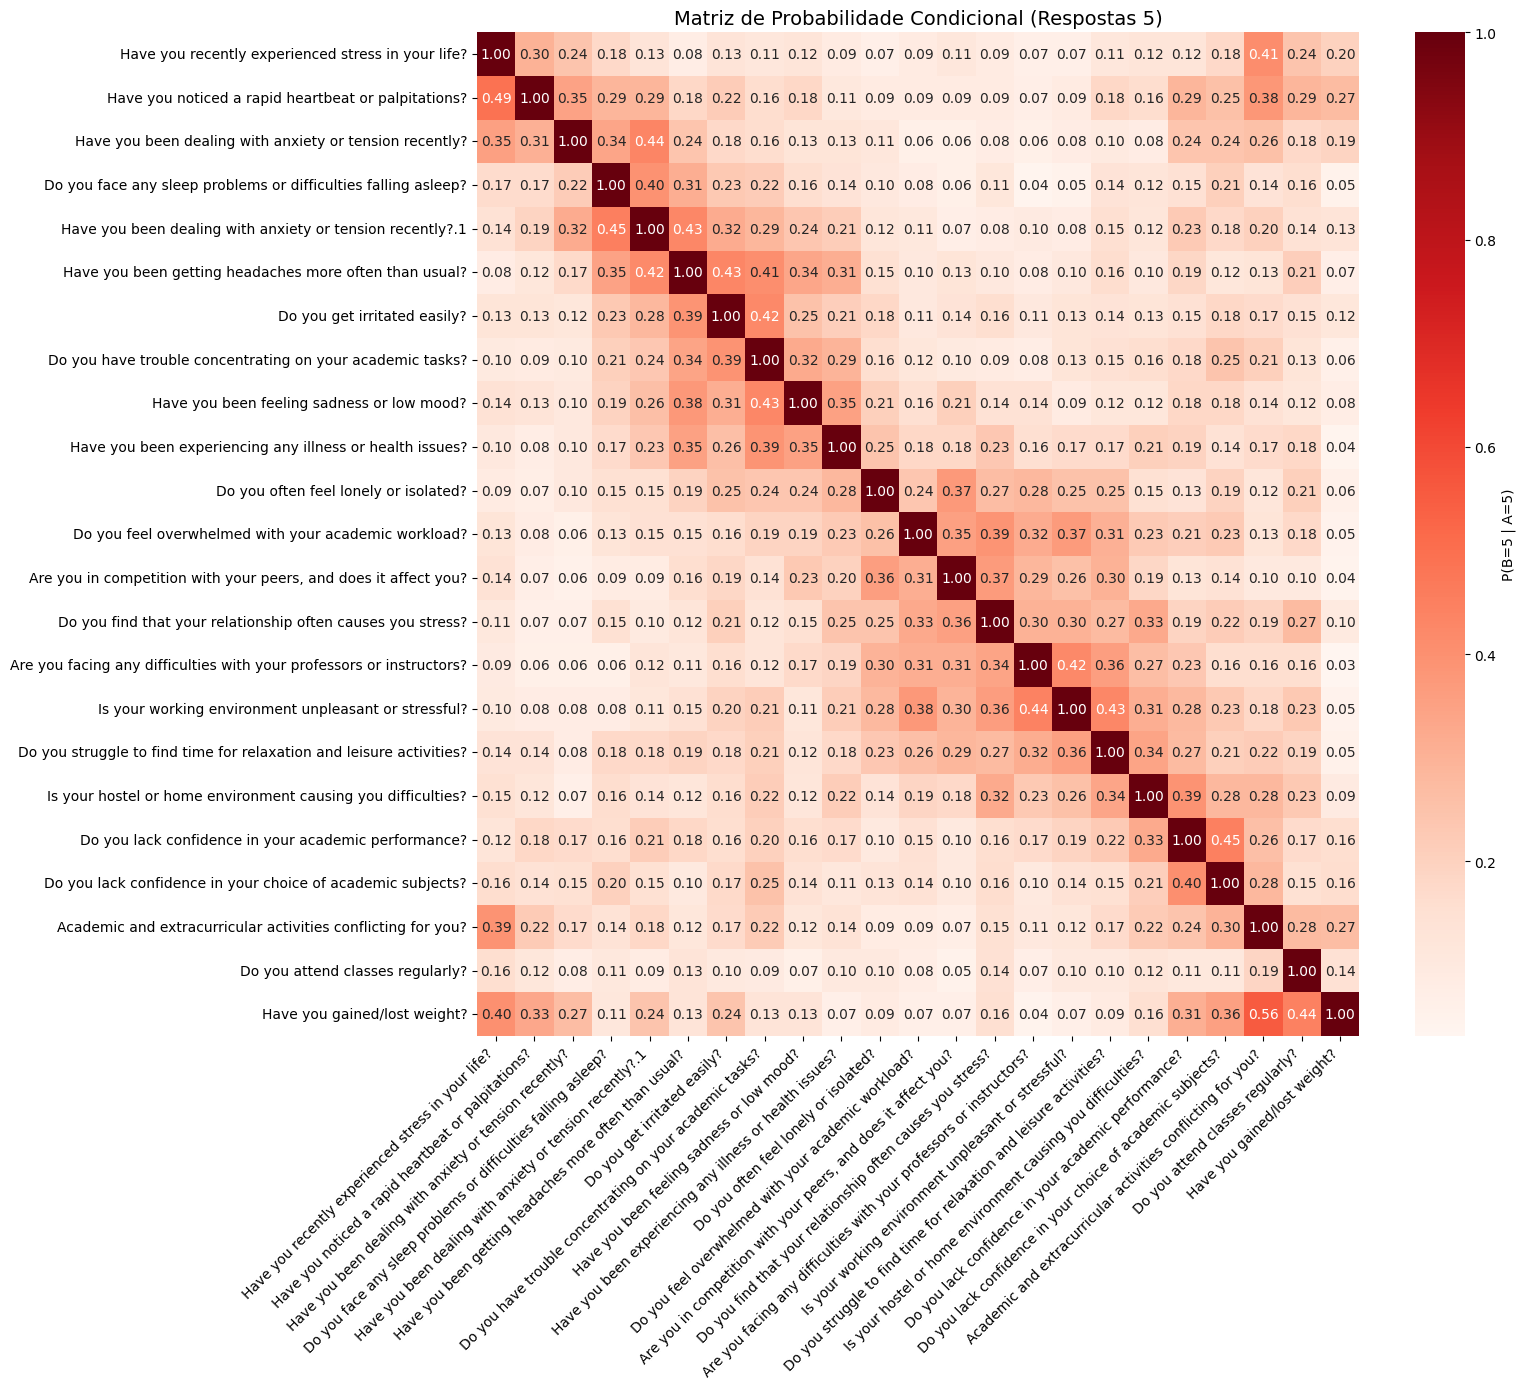

In [17]:
def matriz_condicional(df, variaveis):
    """
    Gera matriz P(B=5 | A=5) para todas as combinações de perguntas.
    """
    matriz = pd.DataFrame(index=variaveis, columns=variaveis, dtype=float)
    
    for pergunta_A in variaveis:
        for pergunta_B in variaveis:
            subset = df[df[pergunta_A] == 5]
            if len(subset) == 0:
                matriz.loc[pergunta_A, pergunta_B] = None
            else:
                matriz.loc[pergunta_A, pergunta_B] = (subset[pergunta_B] == 5).mean()
    
    return matriz

# Lista de perguntas
variaveis = [
    "Have you recently experienced stress in your life?",
        "Have you noticed a rapid heartbeat or palpitations?",
        "Have you been dealing with anxiety or tension recently?",
        "Do you face any sleep problems or difficulties falling asleep?",
        "Have you been dealing with anxiety or tension recently?.1",
        "Have you been getting headaches more often than usual?",
        "Do you get irritated easily?",
        "Do you have trouble concentrating on your academic tasks?",
        "Have you been feeling sadness or low mood?",
        "Have you been experiencing any illness or health issues?",
        "Do you often feel lonely or isolated?",
        "Do you feel overwhelmed with your academic workload?",
        "Are you in competition with your peers, and does it affect you?",
        "Do you find that your relationship often causes you stress?",
        "Are you facing any difficulties with your professors or instructors?",
        "Is your working environment unpleasant or stressful?",
        "Do you struggle to find time for relaxation and leisure activities?",
        "Is your hostel or home environment causing you difficulties?",
        "Do you lack confidence in your academic performance?",
        "Do you lack confidence in your choice of academic subjects?",
        "Academic and extracurricular activities conflicting for you?",
        "Do you attend classes regularly?",
        "Have you gained/lost weight?"
]

# Criar matriz
matriz_probs = matriz_condicional(df, variaveis)

# Plotar heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(matriz_probs, annot=True, fmt=".2f", cmap="Reds", cbar_kws={'label': 'P(B=5 | A=5)'})
plt.title("Matriz de Probabilidade Condicional (Respostas 5)", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


####Análise do Heatmap de Probabilidade Condicional

Observa-se no heatmap que as probabilidades condicionais identificadas variam de baixas a moderadas. A associação mais forte encontrada foi no caso em que, dado que um estudante tenha ganhado ou perdido peso, existe uma probabilidade de 56% de também relatar conflitos com atividades extracurriculares. Embora valores entre 30% e 50% sejam geralmente considerados moderados, em se tratando de saúde mental e bem-estar estudantil, 56% pode ser considerado um indicador preocupante.

Outro achado relevante é que estudantes que relataram batimentos cardíacos acelerados ou palpitações apresentaram uma probabilidade de 49% de também reportarem algum nível de estresse. Além disso, 45% dos alunos que não têm confiança no próprio desempenho acadêmico também não se sentem seguros quanto à escolha das disciplinas.

Algumas associações adicionais também se destacam:

* 44% dos estudantes que relataram ter ganhado peso também frequentam as aulas regularmente.
* O mesmo valor (44%) aparece entre aqueles que vivenciam tensão ou ansiedade e os que têm dores de cabeça frequentes.
* Há uma probabilidade de 43% de que quem sofre com tensão ou ansiedade também apresente cefaleias frequentes, assim como se observa entre quem relata dores de cabeça e maior irritabilidade.
* Entre os que se sentem tristes ou de mau humor, há 43% de chance de também apresentarem dificuldade de concentração nas tarefas acadêmicas.
* Uma associação semelhante (43%) ocorre entre os que consideram o ambiente de trabalho desagradável ou estressante e aqueles que relatam falta de tempo para lazer e relaxamento.

Já no nível de 42%, destacam-se duas relações:

* Estudantes que se irritam facilmente têm maior probabilidade de também apresentar dificuldades de concentração.
* Aqueles que enfrentam problemas com professores ou instrutores apresentam a mesma probabilidade de relatar um ambiente de trabalho desagradável ou estressante.

Por fim, estudantes que já passaram por algum tipo de estresse recente apresentaram 41% de chance de também vivenciarem conflitos entre atividades acadêmicas e extracurriculares, enquanto os que ganharam ou perderam peso mostraram 40% de probabilidade de também terem enfrentado situações estressantes.

De modo geral, a maior parte dos resultados apresenta associações fracas, mas alguns achados (≥40%) merecem destaque, pois sugerem relações importantes entre fatores de saúde mental, hábitos de vida e desempenho acadêmico. Esses indicadores podem servir de base para futuras análises mais aprofundadas e para a construção de estratégias de prevenção e intervenção direcionadas.



####Estresse Médio por Idade

Além das análises já apresentadas, também é possível verificar a média do nível de estresse em função da idade dos estudantes.
O gráfico a seguir mostra a distribuição do estresse médio entre os alunos de 18 a 21 anos, permitindo identificar se há uma tendência de aumento ou redução conforme a idade avança.

Esse tipo de análise é importante porque ajuda a compreender se determinados grupos etários estão mais vulneráveis ao estresse e, portanto, podem demandar estratégias específicas de apoio.

In [53]:
def estresse_18a21(df, coluna_idade, colunas_estresse):
    """
    Analisa a relação entre idade (18 a 21 anos) e nível de estresse.
    Mostra gráfico com idades 18,19,20,21 no eixo X e estresse médio no eixo Y.
    """
    # Criar coluna com estresse médio por participante
    df["Estresse_Medio"] = df[colunas_estresse].mean(axis=1)

    # Filtrar somente idades entre 18 e 21 anos
    df_filtro = df[df[coluna_idade].between(18, 21)]

    # Calcular estresse médio por idade
    estresse_por_idade = df_filtro.groupby(coluna_idade)["Estresse_Medio"].mean()

    # Plotar gráfico de barras
    plt.figure(figsize=(7,5))
    sns.barplot(x=estresse_por_idade.index, 
    y=estresse_por_idade.values, 
    hue=estresse_por_idade.index, 
    palette="Reds", 
    edgecolor="black",
    legend=False
    )
    plt.title("Nível Médio de Estresse por Idade (18–21 anos)")
    plt.xlabel("Idade")
    plt.ylabel("Estresse Médio (1–5)")
    plt.ylim(1,5)  # já que a escala de estresse vai de 1 a 5
    plt.show()

    return estresse_por_idade

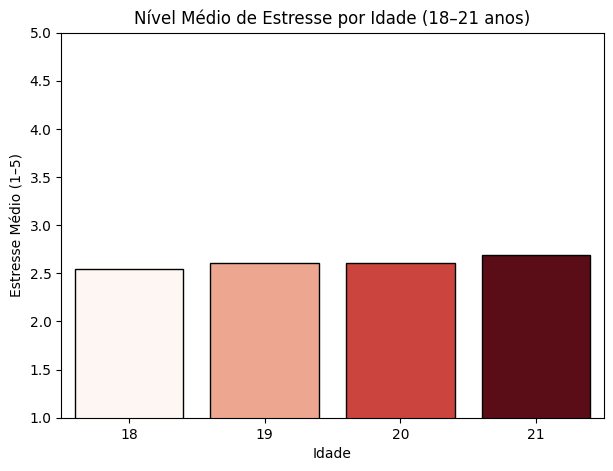

Age
18    2.549012
19    2.610533
20    2.610182
21    2.694227
Name: Estresse_Medio, dtype: float64


In [54]:
colunas_estresse = [
    "Have you recently experienced stress in your life?",
        "Have you noticed a rapid heartbeat or palpitations?",
        "Have you been dealing with anxiety or tension recently?",
        "Do you face any sleep problems or difficulties falling asleep?",
        "Have you been dealing with anxiety or tension recently?.1",
        "Have you been getting headaches more often than usual?",
        "Do you get irritated easily?",
        "Do you have trouble concentrating on your academic tasks?",
        "Have you been feeling sadness or low mood?",
        "Have you been experiencing any illness or health issues?",
        "Do you often feel lonely or isolated?",
        "Do you feel overwhelmed with your academic workload?",
        "Are you in competition with your peers, and does it affect you?",
        "Do you find that your relationship often causes you stress?",
        "Are you facing any difficulties with your professors or instructors?",
        "Is your working environment unpleasant or stressful?",
        "Do you struggle to find time for relaxation and leisure activities?",
        "Is your hostel or home environment causing you difficulties?",
        "Do you lack confidence in your academic performance?",
        "Do you lack confidence in your choice of academic subjects?",
        "Academic and extracurricular activities conflicting for you?",
        "Do you attend classes regularly?",
        "Have you gained/lost weight?"
] 

resultado = estresse_18a21(df, "Age", colunas_estresse)
print(resultado)


A variação do nível médio de estresse entre as idades é pequena — passando de 2,55 aos 18 anos para 2,69 aos 21 anos. Isso sugere uma ligeira tendência de aumento do estresse conforme o estudante envelhece, mas a diferença observada não é suficientemente expressiva para confirmar um padrão consistente.

É importante destacar que esse valor médio considera o conjunto completo de perguntas. Quando analisamos as questões de forma individual, as variações podem ser mais significativas. Esse comportamento será explorado na análise por clusters apresentada a seguir.


In [51]:
def estresse1_18a21(df, coluna_idade, colunas_estresse):
    """
    Analisa a relação entre idade (18 a 21 anos) e nível de estresse.
    Mostra gráfico com idades 18,19,20,21 no eixo X e estresse médio no eixo Y.
    """
    # Criar coluna com estresse médio por participante
    df["Estresse_Medio"] = df[colunas_estresse].mean(axis=1)

    # Filtrar somente idades entre 18 e 21 anos
    df_filtro = df[df[coluna_idade].between(18, 21)]

    # Calcular estresse médio por idade
    estresse_por_idade = df_filtro.groupby(coluna_idade)["Estresse_Medio"].mean()

    # Plotar gráfico de barras
    plt.figure(figsize=(7,5))
    sns.barplot(x=estresse_por_idade.index, 
    y=estresse_por_idade.values, 
    hue=estresse_por_idade.index, 
    palette="Reds", 
    edgecolor="black",
    legend=False
    )
    plt.title("Indicadores emocionais e de estresse por Idade (18–21 anos)")
    plt.xlabel("Idade")
    plt.ylabel("Estresse Médio (1–5)")
    plt.ylim(1,5)  # já que a escala de estresse vai de 1 a 5
    plt.show()

    return estresse_por_idade

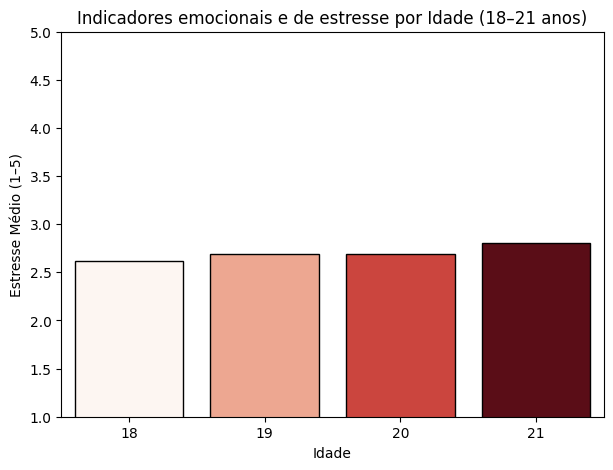

Age
18    2.619318
19    2.687060
20    2.695513
21    2.800205
Name: Estresse_Medio, dtype: float64


In [52]:
colunas_estresse = [
    "Have you recently experienced stress in your life?",
    "Have you noticed a rapid heartbeat or palpitations?",
    "Have you been dealing with anxiety or tension recently?",
    "Do you face any sleep problems or difficulties falling asleep?",
    "Do you have trouble concentrating on your academic tasks?",
    "Have you been feeling sadness or low mood?",
    "Do you get irritated easily?",
    "Do you often feel lonely or isolated?"
] 

resultado = estresse1_18a21(df, "Age", colunas_estresse)
print(resultado)

Ao considerar apenas os fatores relacionados a alterações emocionais e estressores, observa-se um leve aumento no nível médio de estresse em comparação à média geral verificada anteriormente. Nesse recorte, os valores passam de 2,62 aos 18 anos para 2,80 aos 21 anos, indicando uma tendência discreta de crescimento do estresse conforme a idade dos entrevistados avança.

In [49]:
def estresse2_18a21(df, coluna_idade, colunas_estresse):
    """
    Analisa a relação entre idade (18 a 21 anos) e nível de estresse.
    Mostra gráfico com idades 18,19,20,21 no eixo X e estresse médio no eixo Y.
    """
    # Criar coluna com estresse médio por participante
    df["Estresse_Medio"] = df[colunas_estresse].mean(axis=1)

    # Filtrar somente idades entre 18 e 21 anos
    df_filtro = df[df[coluna_idade].between(18, 21)]

    # Calcular estresse médio por idade
    estresse_por_idade = df_filtro.groupby(coluna_idade)["Estresse_Medio"].mean()

    # Plotar gráfico de barras
    plt.figure(figsize=(7,5))
    sns.barplot(x=estresse_por_idade.index, 
    y=estresse_por_idade.values, 
    hue=estresse_por_idade.index,
    palette="Reds",
    edgecolor="black",
    legend=False
    )
    plt.title("Indicadores Físicos e de Saúde por Idade (18–21 anos)")
    plt.xlabel("Idade")
    plt.ylabel("Estresse Médio (1–5)")
    plt.ylim(1,5)  # já que a escala de estresse vai de 1 a 5
    plt.show()

    return estresse_por_idade

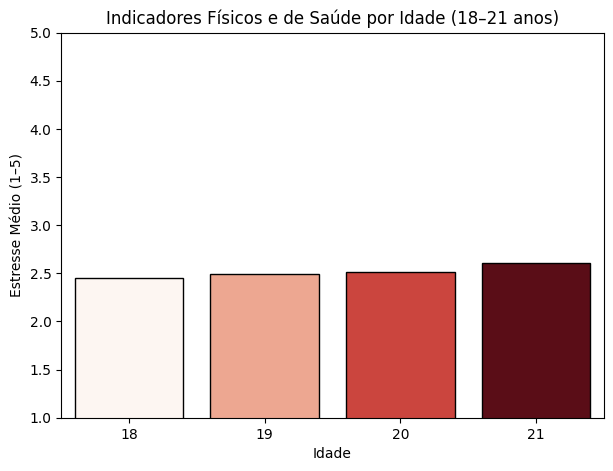

Age
18    2.454545
19    2.494131
20    2.517094
21    2.603825
Name: Estresse_Medio, dtype: float64


In [50]:
colunas_estresse = [
    "Have you been getting headaches more often than usual?",
    "Have you been experiencing any illness or health issues?",
    "Have you gained/lost weight?"
] 

resultado = estresse2_18a21(df, "Age", colunas_estresse)
print(resultado)

A variação nos indicadores físicos e de saúde em função da idade foi ligeiramente menor do que aquela observada para os fatores emocionais e o nível médio de estresse. Apesar disso, a média geral se manteve em um patamar semelhante aos anteriores, reforçando a tendência de aumento no nível de estresse entre alunos mais velhos.

In [47]:
def estresse3_18a21(df, coluna_idade, colunas_estresse):
    """
    Analisa a relação entre idade (18 a 21 anos) e nível de estresse.
    Mostra gráfico com idades 18,19,20,21 no eixo X e estresse médio no eixo Y.
    """
    # Criar coluna com estresse médio por participante
    df["Estresse_Medio"] = df[colunas_estresse].mean(axis=1)

    # Filtrar somente idades entre 18 e 21 anos
    df_filtro = df[df[coluna_idade].between(18, 21)]

    # Calcular estresse médio por idade
    estresse_por_idade = df_filtro.groupby(coluna_idade)["Estresse_Medio"].mean()

    # Plotar gráfico de barras
    plt.figure(figsize=(7,5))
    sns.barplot(x=estresse_por_idade.index,
     y=estresse_por_idade.values, 
     hue=estresse_por_idade.index, 
     palette="Reds", 
     edgecolor="black",
     legend=False
     )
    plt.title("Estressores Acadêmicos e Ambientais por Idade (18–21 anos)")
    plt.xlabel("Idade")
    plt.ylabel("Estresse Médio (1–5)")
    plt.ylim(1,5)  # já que a escala de estresse vai de 1 a 5
    plt.show()

    return estresse_por_idade

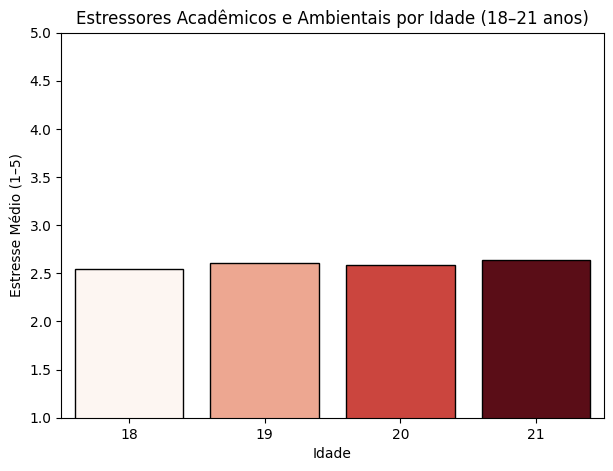

Age
18    2.543434
19    2.607199
20    2.591168
21    2.635701
Name: Estresse_Medio, dtype: float64


In [48]:
colunas_estresse = [
    "Do you feel overwhelmed with your academic workload?",
    "Are you in competition with your peers, and does it affect you?",  
    "Do you lack confidence in your academic performance?",
    "Do you lack confidence in your choice of academic subjects?",
    "Academic and extracurricular activities conflicting for you?",
    "Do you attend classes regularly?",
    "Are you facing any difficulties with your professors or instructors?",
    "Is your working environment unpleasant or stressful?",
"Is your hostel or home environment causing you difficulties?"
] 

resultado = estresse3_18a21(df, "Age", colunas_estresse)
print(resultado)

O nível de estresse no ambiente acadêmico apresentou pouca variação na média geral das respostas em diferentes faixas etárias, embora evidencie um leve aumento entre os alunos de 18 a 21 anos.

In [45]:
def estresse4_18a21(df, coluna_idade, colunas_estresse):
    """
    Analisa a relação entre idade (18 a 21 anos) e nível de estresse.
    Mostra gráfico com idades 18,19,20,21 no eixo X e estresse médio no eixo Y.
    """
    # Criar coluna com estresse médio por participante
    df["Estresse_Medio"] = df[colunas_estresse].mean(axis=1)

    # Filtrar somente idades entre 18 e 21 anos
    df_filtro = df[df[coluna_idade].between(18, 21)]

    # Calcular estresse médio por idade
    estresse_por_idade = df_filtro.groupby(coluna_idade)["Estresse_Medio"].mean()

    # Plotar gráfico de barras
    plt.figure(figsize=(7,5))
    sns.barplot(x=estresse_por_idade.index, 
    y=estresse_por_idade.values, 
    hue=estresse_por_idade.index, 
    palette="Reds", 
    edgecolor="black",
    legend=False
    )
    plt.title("Fatores sociais e de relacionamento por Idade (18–21 anos)")
    plt.xlabel("Idade")
    plt.ylabel("Estresse Médio (1–5)")
    plt.ylim(1,5)  # já que a escala de estresse vai de 1 a 5
    plt.show()

    return estresse_por_idade

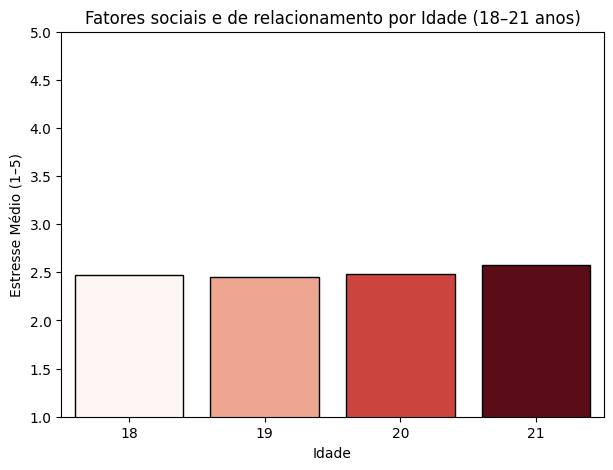

Age
18    2.477273
19    2.450704
20    2.480769
21    2.573770
Name: Estresse_Medio, dtype: float64


In [46]:
colunas_estresse = [
    "Do you find that your relationship often causes you stress?",
    "Do you struggle to find time for relaxation and leisure activities?"
] 

resultado = estresse4_18a21(df, "Age", colunas_estresse)
print(resultado)

A relação entre fatores sociais e de relacionamento por idade, assim como as demais relações analisadas até aqui, apresentou baixa amplitude na variação dos níveis de estresse, atingindo seu pico de 2,57 aos 21 anos, representando um leve aumento em comparação aos 2,48 registrados aos 18 anos.

Quando analisados separadamente, os clusters não mostraram diferenças significativas em relação à média geral de estresse apresentada no gráfico de nível médio de estresse por idade. Foram observadas apenas pequenas variações, como médias mais baixas aos 18 anos (por exemplo, 2,48 em fatores sociais e de relacionamento) e médias mais altas em indicadores emocionais e de estresse (como 2,80).

Nenhum cluster se destacou de maneira expressiva na relação com a idade, mantendo-se, ao final, em um nível de estresse mediano, que, no entanto, merece acompanhamento contínuo.

Ao analisar especificamente a porcentagem de respostas no nível máximo (5) para cada faixa etária, é possível observar como o estresse extremo varia de acordo com a idade. Esse recorte permite compreender melhor se há tendência de aumento do nível mais crítico de estresse conforme os estudantes avançam nos anos de graduação.

O gráfico a seguir apresenta essa distribuição de respostas nível 5 por idade, evidenciando as diferenças percentuais entre os grupos etários:

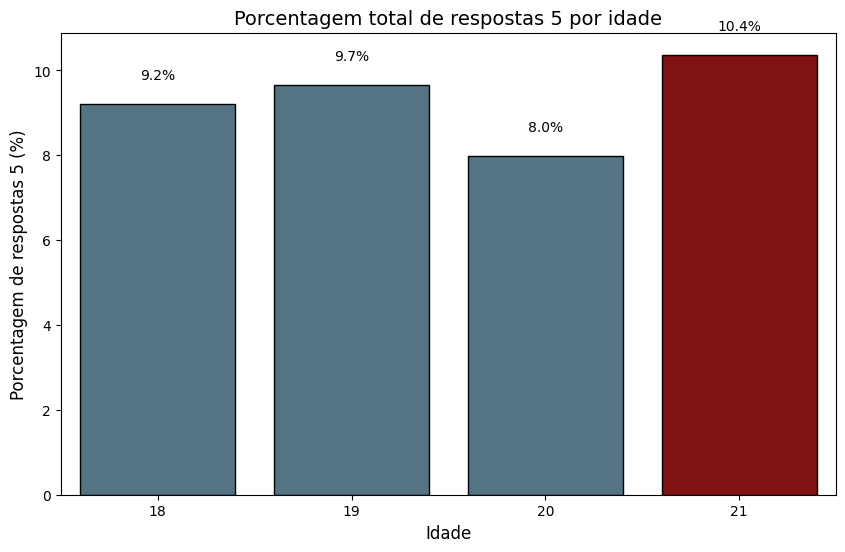

In [28]:
# Lista das 23 perguntas
perguntas = [
    'Have you recently experienced stress in your life?', 
    'Have you noticed a rapid heartbeat or palpitations?', 
    'Have you been dealing with anxiety or tension recently?', 
    'Do you face any sleep problems or difficulties falling asleep?', 
    'Have you been dealing with anxiety or tension recently?.1', 
    'Have you been getting headaches more often than usual?', 
    'Do you get irritated easily?', 
    'Do you have trouble concentrating on your academic tasks?', 
    'Have you been feeling sadness or low mood?', 
    'Have you been experiencing any illness or health issues?', 
    'Do you often feel lonely or isolated?', 
    'Do you feel overwhelmed with your academic workload?', 
    'Are you in competition with your peers, and does it affect you?', 
    'Do you find that your relationship often causes you stress?', 
    'Are you facing any difficulties with your professors or instructors?', 
    'Is your working environment unpleasant or stressful?', 
    'Do you struggle to find time for relaxation and leisure activities?', 
    'Is your hostel or home environment causing you difficulties?', 
    'Do you lack confidence in your academic performance?', 
    'Do you lack confidence in your choice of academic subjects?', 
    'Academic and extracurricular activities conflicting for you?', 
    'Do you attend classes regularly?', 
    'Have you gained/lost weight?', 
    
]

# Filtrar estudantes de 18 a 21 anos
df_idade = df[(df['Age'] >= 18) & (df['Age'] <= 21)]

# Criar dataframe somente com respostas 5 (1 se for 5, 0 caso contrário)
df_resposta5 = df_idade[perguntas].eq(5).astype(int)

# Adicionar coluna de idade
df_resposta5['Age'] = df_idade['Age']

# Contagem de respostas 5 por idade
contagem_por_idade = df_resposta5.groupby('Age')[perguntas].sum().reset_index()

# Calcular porcentagem de respostas 5
# Número de estudantes por idade
num_estudantes = df_idade.groupby('Age').size().reset_index(name='Total_students')

# Mesclar para calcular porcentagem
contagem_por_idade = contagem_por_idade.merge(num_estudantes, left_on='Age', right_on='Age')

# Porcentagem de respostas 5 por pergunta
for p in perguntas:
    contagem_por_idade[p] = contagem_por_idade[p] / contagem_por_idade['Total_students'] * 100

# Porcentagem total de respostas 5 por idade
contagem_por_idade['Total_5_percent'] = contagem_por_idade[perguntas].sum(axis=1) / len(perguntas)

# Gráfico porcentagem total de respostas 5 por idade
plt.figure(figsize=(10, 6))

# Criar uma paleta manual: todas cinza, exceto a idade 21 em vermelho
cores = ['#4d778b' if age != 21 else '#920000' for age in contagem_por_idade["Age"]]

ax = sns.barplot(
    data=contagem_por_idade,
    x='Age',
    y='Total_5_percent',
    hue='Age',             # necessário para evitar o warning
    palette=dict(zip(contagem_por_idade['Age'], cores)),
    edgecolor="black",
    legend=False           # remove legenda extra
)

plt.title('Porcentagem total de respostas 5 por idade', fontsize=14)
plt.ylabel('Porcentagem de respostas 5 (%)', fontsize=12)
plt.xlabel('Idade', fontsize=12)

# Adicionar os valores percentuais em cada barra
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,
        height + 0.5,
        f'{height:.1f}%',
        ha='center', va='bottom', fontsize=10, color='black'
    )

plt.show()

Observa-se um leve aumento do nível máximo de estresse dos 18 aos 19 anos, passando de 9,2% para 9,7%. Aos 20 anos ocorre uma queda para 8%, sugerindo menor concentração de respostas extremas nesse grupo. O maior percentual aparece aos 21 anos, quando o nível máximo de estresse atinge 10,4%. Esse aumento pode estar relacionado a fatores como maior carga acadêmica, pressões para finalização do curso e preocupações com o mercado de trabalho.

Apesar do crescimento aos 21 anos, os valores permanecem no máximo em 10,4%, evidenciando que a maioria dos estudantes não se encontra em nível crítico de estresse. Ainda assim, há um grupo menor que merece atenção preventiva.

O gráfico, portanto, indica uma tendência discreta de crescimento das respostas extremas (nível 5) com o avanço da idade, especialmente no último ano analisado. Embora não caracterize um cenário alarmante, esses dados sinalizam a existência de um grupo de risco que pode beneficiar-se de acompanhamento e suporte adicional — sobretudo entre os alunos mais velhos.

Realizando uma verificação detalhada de cada pergunta respondida pelos estudantes, segmentada por faixa etária (18 a 21 anos), obteve-se as porcentagens de respostas no nível máximo (5) para cada item do questionário.

Esses resultados foram organizados em um heatmap, que possibilita visualizar rapidamente quais fatores apresentam maior nível de estresse extremo por idade. O uso do heatmap facilita a comparação entre as diferentes perguntas e faixas etárias, evidenciando padrões, tendências e potenciais fatores críticos.

Com essa análise, torna-se possível identificar não apenas os temas mais críticos, mas também se há mudanças relevantes conforme a idade dos participantes, permitindo uma compreensão mais profunda da relação entre estresse e maturidade acadêmica.

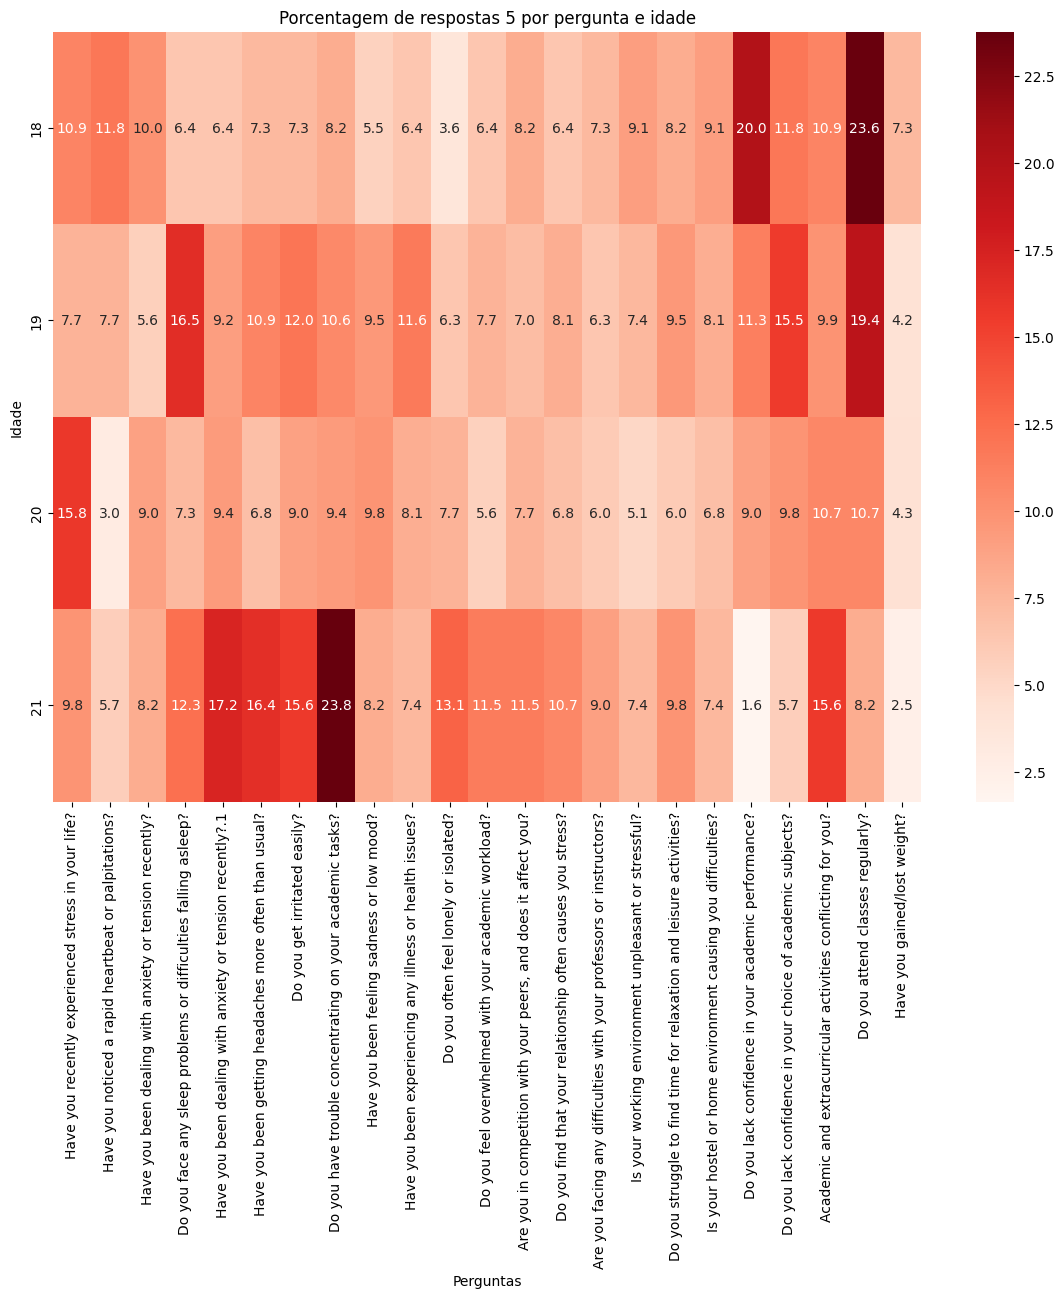

In [29]:
# Gráfico heatmap de porcentagem de respostas 5 por pergunta e idade
plt.figure(figsize=(14, 10))
sns.heatmap(contagem_por_idade.set_index('Age')[perguntas], annot=True, fmt='.1f', cmap="Reds")
plt.title('Porcentagem de respostas 5 por pergunta e idade')
plt.ylabel('Idade')
plt.xlabel('Perguntas')
plt.show() 

Em geral, os percentuais mais altos de respostas no nível máximo de estresse aparecem em poucas questões específicas, enquanto a maior parte dos valores se concentra entre 5% e 12%. As áreas críticas se destacam com valores acima de 15%, evidenciando fatores pontuais de estresse extremo.

* 18 anos: A maioria das questões fica abaixo de 10%, mas há picos importantes: falta de confiança no desempenho acadêmico (20%) e frequência às aulas regularmente (23,6%).

* 19 anos: O padrão é mais homogêneo, porém surgem aumentos relevantes em “Problemas de sono ou dificuldade para dormir” (16,5%), “Falta de confiança na escolha das disciplinas acadêmicas” (15,5%) e “Frequência às aulas regularmente” (19,4%).

* 20 anos: Observa-se uma redução geral dos percentuais extremos, embora algumas questões permaneçam elevadas, como “Passou por estresse recentemente?” (15,8%).

* 21 anos: Retornam os percentuais altos em múltiplos fatores críticos. Destacam-se “Ansiedade ou tensão recentemente” (17,2%), “Dores de cabeça com mais frequência” (16,4%), “Irrita-se facilmente” (15,6%), “Dificuldade para se concentrar nas tarefas acadêmicas” (23,8%) e “Atividades acadêmicas e extracurriculares conflitantes” (15,6%). Essa faixa etária se mostra a mais vulnerável em aspectos emocionais e acadêmicos.

O padrão crescente nas idades mais avançadas (21 anos) pode refletir:
* Maior carga acadêmica e responsabilidades no final do curso.
* Preocupações com o mercado de trabalho e futuro profissional.
* Menor tempo para lazer e autocuidado.

Apesar desses picos, a maioria das respostas extremas permanece abaixo de 15%, indicando que o grupo de maior risco é minoritário, porém claramente presente na pesquisa.

Dando continuidade à análise, o próximo passo foi verificar a relação entre os níveis de estresse e o gênero dos entrevistados, para compreender possíveis diferenças de padrões entre os grupos.

In [43]:
def estresse_por_genero(df, coluna_genero, colunas_estresse):
    """
    Analisa a relação entre gênero e nível de estresse.
    Mostra gráfico com gêneros no eixo X e estresse médio no eixo Y.
    """
    # Criar coluna com estresse médio por participante
    df["Estresse_Medio"] = df[colunas_estresse].mean(axis=1)

    # Calcular estresse médio por gênero
    estresse_genero = df.groupby(coluna_genero)["Estresse_Medio"].mean()

    # Plotar gráfico de barras
    plt.figure(figsize=(7,5))
    sns.barplot(
        x=estresse_genero.index,
        y=estresse_genero.values,
        hue=estresse_genero.index,
        palette="Reds",
        edgecolor="black",
        legend=False
    )
    plt.title("Nível Médio de Estresse por Gênero")
    plt.xlabel("Gênero")
    plt.ylabel("Estresse Médio (1–5)")
    plt.ylim(1,5)  # Escala de 1 a 5
    plt.show()

    return estresse_genero


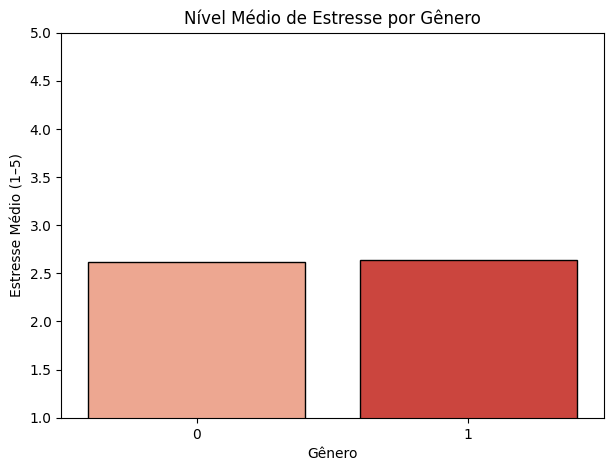

Gender
0    2.622501
1    2.636109
Name: Estresse_Medio, dtype: float64


In [44]:
colunas_estresse = [
    'Have you recently experienced stress in your life?', 
    'Have you noticed a rapid heartbeat or palpitations?', 
    'Have you been dealing with anxiety or tension recently?', 
    'Do you face any sleep problems or difficulties falling asleep?', 
    'Have you been dealing with anxiety or tension recently?.1', 
    'Have you been getting headaches more often than usual?', 
    'Do you get irritated easily?', 
    'Do you have trouble concentrating on your academic tasks?', 
    'Have you been feeling sadness or low mood?', 
    'Have you been experiencing any illness or health issues?', 
    'Do you often feel lonely or isolated?', 
    'Do you feel overwhelmed with your academic workload?', 
    'Are you in competition with your peers, and does it affect you?', 
    'Do you find that your relationship often causes you stress?', 
    'Are you facing any difficulties with your professors or instructors?', 
    'Is your working environment unpleasant or stressful?', 
    'Do you struggle to find time for relaxation and leisure activities?', 
    'Is your hostel or home environment causing you difficulties?', 
    'Do you lack confidence in your academic performance?', 
    'Do you lack confidence in your choice of academic subjects?', 
    'Academic and extracurricular activities conflicting for you?', 
    'Do you attend classes regularly?', 
    'Have you gained/lost weight?'
]

resultado = estresse_por_genero(df, "Gender", colunas_estresse)
print(resultado)


O gráfico apresenta o nível médio de estresse por gênero, onde os códigos 0 e 1 correspondem, respectivamente, a masculino e feminino. Nota-se que o nível médio de estresse é bastante semelhante entre os dois grupos, situando-se em torno de 2,6 numa escala de 1 a 5. Essa constatação sugere que, na amostra analisada, não há diferença estatisticamente relevante no nível médio de estresse entre homens e mulheres.

Esse resultado indica que outros fatores – como idade, aspectos emocionais, contexto acadêmico ou condições socioeconômicas – podem exercer maior influência sobre os níveis de estresse do que o gênero em si.

Ao analisar somente as médias percentuais das respostas no nível máximo (5), segmentadas por gênero, é possível verificar quais fatores apresentam maior concentração de estresse elevado em cada grupo. Esse enfoque permite identificar áreas críticas específicas para homens e mulheres, auxiliando na compreensão de possíveis diferenças sutis e direcionando ações preventivas mais assertivas.

In [41]:
def respostas5_por_genero(df, coluna_genero, colunas_estresse):
    """
    Analisa a porcentagem de respostas 5 (nível máximo) por gênero.
    Mostra gráfico com gêneros no eixo X e porcentagem média de respostas 5 no eixo Y.
    """

    # Criar DataFrame booleano (True se resposta == 5)
    df_5 = (df[colunas_estresse] == 5).astype(int)  # 1 se resposta = 5, 0 caso contrário

    # Calcular a porcentagem de respostas 5 por participante
    df["Perc_5"] = df_5.mean(axis=1) * 100

    # Calcular média de porcentagem de respostas 5 por gênero
    perc_5_genero = df.groupby(coluna_genero)["Perc_5"].mean()

    # Plotar gráfico de barras
    plt.figure(figsize=(7,5))
    sns.barplot(
        x=perc_5_genero.index,
        y=perc_5_genero.values,
        hue=perc_5_genero.values,
        palette="Reds",
        edgecolor="black",
        legend=False
    )
    plt.title("Percentual médio de respostas 5 por Gênero")
    plt.xlabel("Gênero")
    plt.ylabel("Percentual de respostas 5 (%)")

    # Exibir valores acima das barras
    for i, v in enumerate(perc_5_genero.values):
        plt.text(i, v + 0.5, f"{v:.1f}%", ha='center', fontweight='bold')

    plt.ylim(0, 100)
    plt.show()

    return perc_5_genero

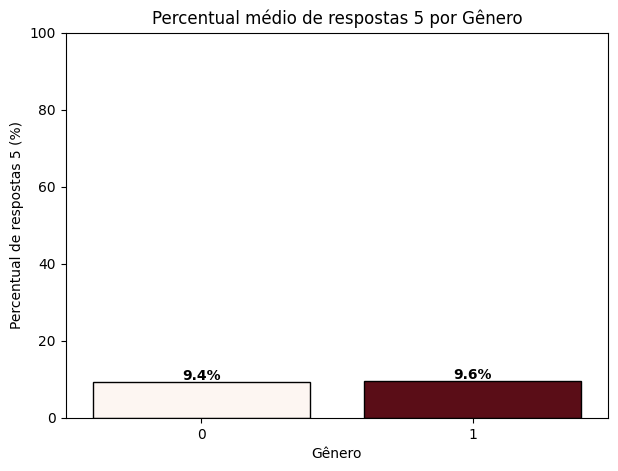

Gender
0    9.370041
1    9.609433
Name: Perc_5, dtype: float64


In [42]:
colunas_estresse = [
    'Have you recently experienced stress in your life?', 
    'Have you noticed a rapid heartbeat or palpitations?', 
    'Have you been dealing with anxiety or tension recently?', 
    'Do you face any sleep problems or difficulties falling asleep?', 
    'Have you been dealing with anxiety or tension recently?.1', 
    'Have you been getting headaches more often than usual?', 
    'Do you get irritated easily?', 
    'Do you have trouble concentrating on your academic tasks?', 
    'Have you been feeling sadness or low mood?', 
    'Have you been experiencing any illness or health issues?', 
    'Do you often feel lonely or isolated?', 
    'Do you feel overwhelmed with your academic workload?', 
    'Are you in competition with your peers, and does it affect you?', 
    'Do you find that your relationship often causes you stress?', 
    'Are you facing any difficulties with your professors or instructors?', 
    'Is your working environment unpleasant or stressful?', 
    'Do you struggle to find time for relaxation and leisure activities?', 
    'Is your hostel or home environment causing you difficulties?', 
    'Do you lack confidence in your academic performance?', 
    'Do you lack confidence in your choice of academic subjects?', 
    'Academic and extracurricular activities conflicting for you?', 
    'Do you attend classes regularly?', 
    'Have you gained/lost weight?'
]

resultado = respostas5_por_genero(df, "Gender", colunas_estresse)
print(resultado)

Observa-se que os participantes identificados como gênero ‘0’ (masculino) apresentaram 9,4% de respostas no nível máximo de estresse, enquanto os identificados como gênero ‘1’ (feminino) apresentaram 9,6%. Essa diferença é mínima, de apenas 0,2 pontos percentuais, e não configura disparidade significativa entre os gêneros. Esses resultados indicam que, na amostra analisada, o nível extremo de estresse é bastante semelhante entre homens e mulheres. Assim, fatores como idade, contexto acadêmico, demandas emocionais ou pressões externas parecem exercer maior influência sobre o nível de estresse do que o gênero em si.

Verificando em um heatmap quais questões foram mais selecionadas como resposta 5, chega-se ao seguinte resultado

In [66]:
def heatmap_respostas5_por_genero(df, coluna_genero, colunas_estresse):
    """
    Cria um heatmap mostrando o percentual de respostas 5 por pergunta e por gênero.
    """

    # Criar DataFrame binário: 1 se resposta = 5, 0 caso contrário
    df_5 = (df[colunas_estresse] == 5).astype(int)

    # Concatenar coluna de gênero para agrupar
    df_5 = pd.concat([df[coluna_genero], df_5], axis=1)

    # Calcular porcentagem de respostas 5 para cada pergunta e gênero
    porcentagem_5 = (
        df_5.groupby(coluna_genero)
        .mean()
        .T * 100
    )  # Transpor para perguntas nas linhas e gêneros nas colunas
    plt.figure(figsize=(14, 10))
    # Plotar heatmap
    plt.figure(figsize=(10, 8))  # Ajusta altura conforme número de perguntas
    sns.heatmap(
        porcentagem_5,
        annot=True, fmt=".1f", cmap="Reds",
        cbar_kws={'label': 'Percentual de respostas 5 (%)'}
    )
    plt.title("Percentual de respostas nível 5 por pergunta e por gênero")
    plt.xlabel("Gênero")
    plt.ylabel("Perguntas")
    plt.tight_layout()
    plt.show()

    return porcentagem_5

<Figure size 1400x1000 with 0 Axes>

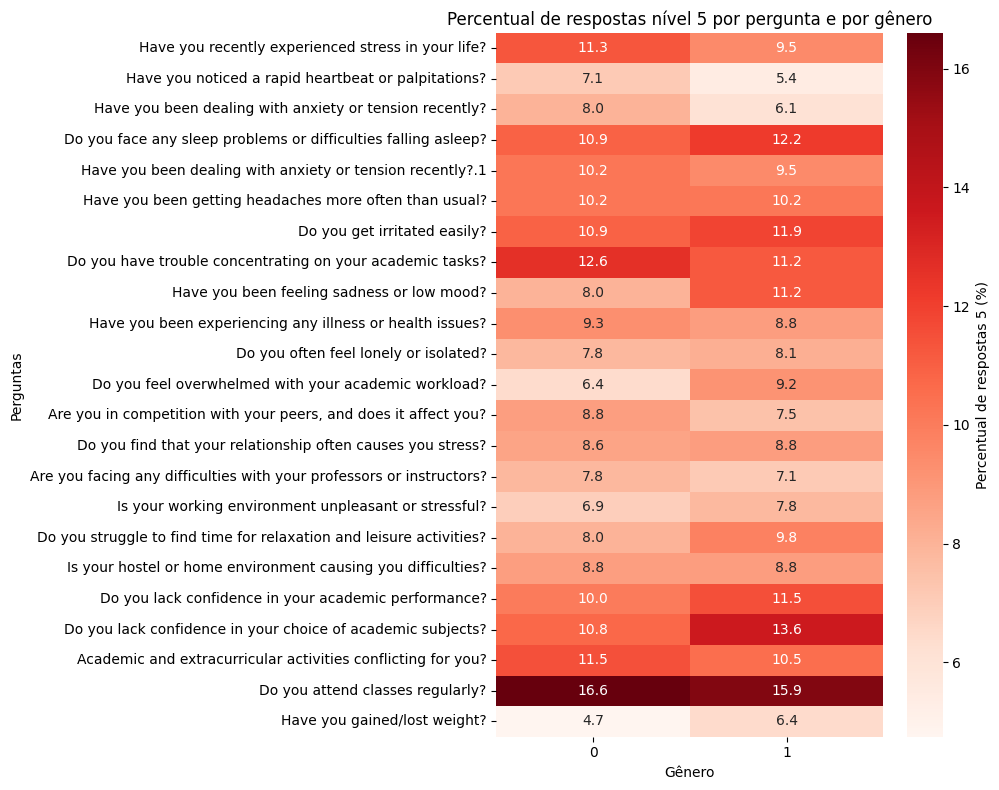

Gender,0,1
Have you recently experienced stress in your life?,11.313869,9.491525
Have you noticed a rapid heartbeat or palpitations?,7.116788,5.423729
Have you been dealing with anxiety or tension recently?,8.029197,6.101695
Do you face any sleep problems or difficulties falling asleep?,10.948905,12.203390
Have you been dealing with anxiety or tension recently?.1,10.218978,9.491525
Have you been getting headaches more often than usual?,10.218978,10.169492
Do you get irritated easily?,10.948905,11.864407
Do you have trouble concentrating on your academic tasks?,12.591241,11.186441
Have you been feeling sadness or low mood?,8.029197,11.186441
Have you been experiencing any illness or health issues?,9.306569,8.813559


In [67]:
colunas_estresse = [
    'Have you recently experienced stress in your life?', 
    'Have you noticed a rapid heartbeat or palpitations?', 
    'Have you been dealing with anxiety or tension recently?', 
    'Do you face any sleep problems or difficulties falling asleep?', 
    'Have you been dealing with anxiety or tension recently?.1', 
    'Have you been getting headaches more often than usual?', 
    'Do you get irritated easily?', 
    'Do you have trouble concentrating on your academic tasks?', 
    'Have you been feeling sadness or low mood?', 
    'Have you been experiencing any illness or health issues?', 
    'Do you often feel lonely or isolated?', 
    'Do you feel overwhelmed with your academic workload?', 
    'Are you in competition with your peers, and does it affect you?', 
    'Do you find that your relationship often causes you stress?', 
    'Are you facing any difficulties with your professors or instructors?', 
    'Is your working environment unpleasant or stressful?', 
    'Do you struggle to find time for relaxation and leisure activities?', 
    'Is your hostel or home environment causing you difficulties?', 
    'Do you lack confidence in your academic performance?', 
    'Do you lack confidence in your choice of academic subjects?', 
    'Academic and extracurricular activities conflicting for you?', 
    'Do you attend classes regularly?', 
    'Have you gained/lost weight?'
]

heatmap_respostas5_por_genero(df, "Gender", colunas_estresse)

Ao analisar o heatmap das respostas nível 5, é possível identificar padrões claros de estresse extremo. A maior parte dos percentuais se concentra entre 7% e 12% para ambos os gêneros, mas algumas questões se destacam com valores mais elevados, revelando pontos críticos.

* Homens (0): os percentuais mais altos aparecem em “Você frequenta as aulas regularmente?” (16,6%), “Você tem dificuldade para se concentrar em suas tarefas acadêmicas?” (12,6%), “Atividades acadêmicas e extracurriculares são conflitantes para você?” (11,5%) e “Você passou por algum estresse recentemente?” (11,3%).

* Mulheres (1): destaques para “Você frequenta as aulas regularmente?” (15,9%), “Você não tem confiança na sua escolha de disciplinas acadêmicas?” (13,6%), “Você enfrenta algum problema de sono ou dificuldade para dormir?” (12,2%), “Você se irrita facilmente?” (11,9%), “Você não tem confiança no seu desempenho acadêmico?” (11,5%), “Você tem dificuldade para se concentrar nas suas tarefas acadêmicas?” (11,2%) e “Anda se sentindo triste ou deprimido?” (11,2%).

Esses resultados indicam que, enquanto no gênero masculino os níveis extremos se concentram mais em hábitos e estresse atual, no gênero feminino os picos se associam a confiança acadêmica e fatores emocionais.

Ainda assim, os percentuais se mantêm relativamente próximos entre os dois grupos, reforçando que o gênero não é o fator isolado mais determinante para níveis críticos de estresse. Aspectos como idade, contexto acadêmico e carga emocional parecem exercer influência mais significativa.